In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import statsmodels.api as sm

#Score Calculating Function
from sklearn.metrics import r2_score, explained_variance_score

In [2]:
url = "https://raw.githubusercontent.com/bursteinalan/Data-Sets/master/Housing/House%20Prediction%20Data.csv"

housing = pd.read_csv(url) 

In [3]:
class RegClass:
    def __init__(self, X, y, model, reg_type):
        self.X = X
        self.y = y
        self.model = model
        self.reg_type = reg_type
        
        # Train Test and Split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        
        self.execute_model()
        
    def train_and_predict(self):
                
        self.model.fit(self.X_train, self.y_train)            # Training the Model
        self.y_pred = self.model.predict(self.X_test)         # Testing the Model
    
    def visualizing_results(self):
        if self.reg_type == "linear" or self.reg_type == "multi":      # Display information of Coefficients and Intercept 
            print("Information about the model\n")
            print(f"     Intercept: {self.model.intercept_}")
            print("Coefficient(s): ", end = '')                        
            for i in self.model.coef_:
                if i == self.model.coef_[-1]:
                    print(i,'\n')
                else:
                    print(str(i)+',', end = ' ')
        
            if self.reg_type == "linear":                          # Visualization for the Regression Model
                plt.scatter(self.X_test, self.y_test, label = "Actual", color = "red", alpha = 0.7)   
                plt.scatter(self.X_test, self.y_pred, label = "Predicted", color = "green")
                plt.legend()
                plt.show()
                
    def score(self):
        print(f"""                
            R-squared value     : {"%.2f"%(r2_score(self.y_test, self.y_pred) * 100)}%
            Explained Variance  : {"%.2f"%(explained_variance_score(self.y_test, self.y_pred))}
            
""")
        
    def execute_model(self):
        
        self.train_and_predict()  #Training and Predicting
        
        self.visualizing_results()          #Visualization
        
        self.score()              #Score
        
        
        

In [4]:
df = housing[["SalePrice", "GrLivArea", "GarageArea", "TotalBsmtSF", "CentralAir"]]

df["Aircond"] = df.CentralAir.map({'N':0, 'Y':1})

df = df[df["SalePrice"] < 500000]

df = df[df["GrLivArea"] < 4000]

df = df[df["GarageArea"] < 1300]

df = df[df["TotalBsmtSF"] < 3000]

df = df[df["TotalBsmtSF"] > 0] #doesn't make sense that area of Basement is 0

df = df.dropna()

C:\Users\karji\AppData\Local\Temp/ipykernel_15568/3887903598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Aircond"] = df.CentralAir.map({'N':0, 'Y':1})


In [5]:
X = df[["GrLivArea"]]
y = df["SalePrice"]



Information about the model

     Intercept: 25234.25408949406
Coefficient(s): 102.11430224613694 



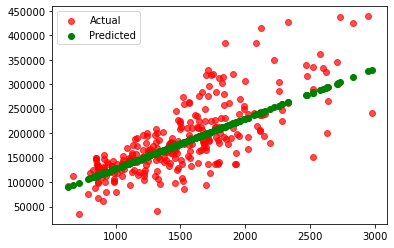

                
            R-squared value     : 55.29%
            Explained Variance  : 0.56
            



In [7]:
linear_regression = RegClass(X,y,  model = LinearRegression(), reg_type = "linear")